### HW Урок 1 
Алгоритм линейной регрессии. Градиентный спуск

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [31]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [32]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

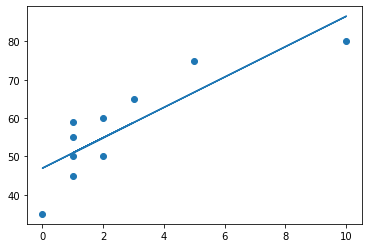

In [135]:
plt.scatter(X[1,:], y)
plt.plot(X[1,:], 46.933 + 3.966*X[1,:])

In [47]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

Градиентный спуск

1. Подберите скорость обучения (alpha) и количество итераций:

**3 Задание: **
вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию 
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [101]:
tall = 1e-5
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W.shape, X.shape, W, alpha

((2,), (2, 10), array([1. , 0.5]), 0.0001)

In [102]:
prev_err = 0
for i in range(100000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    # расчет дельты между предыдущей и текущей ошибкой
    delta = np.abs(prev_err - err)
    # прерываемся при достижении пороговой дельты
    if delta <= tall:
        print(i, W, err, delta)
        break
    else:
        prev_err = err
        
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        
    if i % 1000 == 0:
        print(i, W, err, delta)

0 [1.01102 0.534  ] 3173.15 3173.15
1000 [ 7.38906894 10.68706909] 900.0794345405571 0.20662798291050422
2000 [11.41239979 10.49676806] 735.6901949760081 0.14352954557023168
3000 [14.95426267  9.86968976] 606.1685205795002 0.11652176410837001
4000 [18.14222899  9.28232201] 500.9761357445739 0.09464279597796121
5000 [21.01515239  8.75187884] 415.53533144871926 0.0768720923107935
6000 [23.60433677  8.27376927] 346.1374089768893 0.062438123686604285
7000 [25.93781343  7.8428751 ] 289.770059830036 0.05071436424276499
8000 [28.04083646  7.45453582] 243.9865848111653 0.04119192872369126
9000 [29.93616542  7.10454883] 206.79969175109696 0.03345748324605324
10000 [31.64431213  6.78912647] 176.59523446839947 0.027175303993800526
11000 [33.18376267  6.50485515] 152.06214862364686 0.02207270468377942
12000 [34.57117743  6.2486584 ] 132.13554324111018 0.01792820025752917
13000 [35.82157143  6.01776359] 115.95047771025502 0.014561893029281237
14000 [36.94847681  5.80967189] 102.8044178967979 0.0118

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [133]:
tall = 1e-5
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W.shape, X.shape, W, alpha

((2,), (2, 10), array([1. , 0.5]), 0.0001)

In [134]:
for i in range(50000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    # добавим параметр в np.sum для сложения по осям для соблюдения размерности
    D = (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1)))  
    
    # расчет дельты между предыдущей и текущей ошибкой
    delta = np.abs(prev_err - err)
    # прерываемся при достижении пороговой дельты
    if delta <= tall:
        print(i, W, err, delta)
        break
        
    prev_err = err
    # -------------------------------------------
    
    W -= D
    if i % 1000 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
1000 [ 7.38906894 10.68706909] 900.0794345405571
2000 [11.41239979 10.49676806] 735.6901949760081
3000 [14.95426267  9.86968976] 606.1685205795002
4000 [18.14222899  9.28232201] 500.9761357445739
5000 [21.01515239  8.75187884] 415.53533144871926
6000 [23.60433677  8.27376927] 346.1374089768893
7000 [25.93781343  7.8428751 ] 289.770059830036
8000 [28.04083646  7.45453582] 243.9865848111653
9000 [29.93616542  7.10454883] 206.79969175109696
10000 [31.64431213  6.78912647] 176.59523446839947
11000 [33.18376267  6.50485515] 152.06214862364686
12000 [34.57117743  6.2486584 ] 132.13554324111018
13000 [35.82157143  6.01776359] 115.95047771025502
14000 [36.94847681  5.80967189] 102.8044178967979
15000 [37.96408928  5.62213128] 92.12674172121734
16000 [38.8794001   5.45311213] 83.45397055415961
17000 [39.70431503  5.30078528] 76.40965131472
18000 [40.44776156  5.16350219] 70.68801602753328
19000 [41.11778548  5.03977715] 66.04070956017475
20000 [41.72163799  4.9282711